In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-dark')

In [2]:
os.listdir('../datasets/lifts/')

['base_incremental.csv',
 'INCREMENTALIDADE_PUSH_CRM.xlsx',
 'Lifts - Brasil',
 'analise_incremental.csv',
 'crm_lift_braze_users.csv']

In [8]:

basedir = '../datasets/lifts/'
files_base = os.listdir(basedir)
files = os.listdir('../datasets/lifts/Lifts - Brasil')
files_xls = [f for f in files if f[-3:] == 'xls']
print(files_xls)
files_xlsx = [f for f in files_base if f[-4:] == 'xlsx']
print(files_xlsx)

['Conv. Lift - Mar 2020 - Tricae.xls', 'Conv. Lift - Out 2019 - Tricae.xls', 'Conv. Lift - Out 2019 - Kanui.xls', 'Conv. Lift - Mar 2020 - Dafiti Brazil.xls', 'Conv. Lift - July 2020 - Tricae.xls', 'Conv. Lift - Out 2019 - Dafiti Brazil.xls', 'Conv. Lift - Nov 2019 - Dafiti Brazil.xls', 'Conv. Lift - Multi Cell - Abr 2020 - Dafiti Brazil.xls']
['INCREMENTALIDADE_PUSH_CRM.xlsx']


In [9]:
files_xlsx[0]

'INCREMENTALIDADE_PUSH_CRM.xlsx'

In [5]:
fname = os.path.join(basedir,files_xlsx[0])
# df_crm = pd.read_excel(os.path.join(basedir,files_xlsx[0]))
# df_crm = pd.read_table(os.path.join(basedir,files_xlsx[0]))
# f = open(fname, 'rb')

In [127]:
df_crm1=pd.read_csv(os.path.join(basedir,'base_incremental.csv'),delimiter=';')
df_crm1['first_date_interaction']=pd.to_datetime(df_crm1['first_date_interaction'])
df_crm1['first_uninstall_date']=pd.to_datetime(df_crm1['first_uninstall_date'])
df_crm1.head()

,external_user_id,os,is_control,sale_date,first_session_date,first_uninstall_date,first_register_date,items,price,gtv_acbr,items_acbr,orders_acbr,first_date_interaction,Sales_Braze,Sales_Sales,Sales_1d
0,20341420-BR,AND,1,NaN,27/06/2020,2020-09-27,NaN,0.0,NaN,NaN,NaN,NaN,2020-06-27,0,0,0
1,1937157-BR,AND,0,18/08/2020,08/05/2020,NaT,NaN,1.0,"189,99",NaN,NaN,NaN,2020-08-05,1,0,0
2,2417394-BR,AND,0,NaN,08/06/2020,2020-08-21,NaN,0.0,NaN,NaN,NaN,NaN,2020-08-06,0,0,0
3,17520923-BR,IOS,0,17/08/2020,13/06/2020,NaT,NaN,1.0,"123,89","123,89",1.0,1,2020-06-13,1,1,0
4,31484321-BR,IOS,0,07/08/2020,NaN,NaT,27/06/2020,1.0,"94,99","94,99",1.0,1,2020-06-27,1,1,0


In [128]:
# df_crm1[df_crm1.first_uninstall_date.isna()]

In [129]:
start_date = '2020-06-15'
end_date = '2020-06-30'
#mask_clients by interaction date
mask = (
    (df_crm1['first_date_interaction'] > start_date)
     & (df_crm1['first_date_interaction'] <= end_date)
)
df_crm1=df_crm1.loc[mask]

In [130]:
#mask_clients by unninstal date
mask=(
    (df_crm1['first_uninstall_date'] >= end_date) 
    | (df_crm1['first_uninstall_date'].isna())
)
df_crm1=df_crm1.loc[mask]

In [131]:
df_a=df_crm1.groupby(['external_user_id','is_control'])['first_uninstall_date'].agg('count').reset_index()
user_ls=df_a['external_user_id'].tolist()
df_a=df_a.set_index('external_user_id')
lsa=[user for user in user_ls if df_a.loc[user].shape[0]>2]
if len(lsa) ==0:
    print('no users in both groups')
else: print(f'{len(lsa)} USERS IN CONTROL AND TREATED GROUPS')

no users in both groups


In [132]:
df_crm1.to_csv(os.path.join(basedir,'crm_lift_braze_users.csv'))

In [133]:
df_crm1.shape

(205978, 16)

In [ ]:
# df_crm1 = pd.read_excel(os.path.join(basedir,files_xlsx[0]),sheet_name=1)
# df_crm1.head()

In [123]:
# df_crm2 = pd.read_excel(os.path.join(basedir,files_xlsx[0]),sheet_name=2)
# df_crm2.head()

,Usuários,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Count of external_user_id,Column Labels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Row Labels,04/05/2020 - 10/05/2020,11/05/2020 - 17/05/2020,18/05/2020 - 24/05/2020,25/05/2020 - 31/05/2020,01/06/2020 - 07/06/2020,08/06/2020 - 14/06/2020,15/06/2020 - 21/06/2020,22/06/2020 - 28/06/2020,29/06/2020 - 05/07/2020,...,Grand Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AND,30502,29565,28267,29287,29509,39595,90499,26234,24166,...,446342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,22286,21699,20846,21504,21666,29131,66472,19253,17637,...,327347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# df_crm3 = pd.read_excel(os.path.join(basedir,files_xlsx[0]),sheet_name=3)
# df_crm3.head()

,Usuários,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Count of external_user_id,Column Labels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Row Labels,04/05/2020 - 10/05/2020,11/05/2020 - 17/05/2020,18/05/2020 - 24/05/2020,25/05/2020 - 31/05/2020,01/06/2020 - 07/06/2020,08/06/2020 - 14/06/2020,15/06/2020 - 21/06/2020,22/06/2020 - 28/06/2020,29/06/2020 - 05/07/2020,...,20/07/2020 - 26/07/2020,27/07/2020 - 02/08/2020,03/08/2020 - 09/08/2020,10/08/2020 - 16/08/2020,17/08/2020 - 23/08/2020,24/08/2020 - 30/08/2020,Grand Total,NaN,NaN,NaN
3,AND,30502,29565,28267,29287,29509,39595,90499,26234,24166,...,15290,16079,14506,12833,11650,9615,446342,NaN,NaN,NaN
4,0,22286,21699,20846,21504,21666,29131,66472,19253,17637,...,11165,11798,10624,9454,8579,7030,327347,NaN,NaN,NaN


In [131]:
# print(f'crm 0 : {df_crm0.shape},\ncrm 1 : {df_crm1.shape},\ncrm 2 : {df_crm2.shape},\ncrm 3 : {df_crm3.shape}')
# df_crm0[df_crm0.columns[1]].unique()

crm 0 : (9, 2),
crm 1 : (981975, 16),
crm 2 : (178, 28),
crm 3 : (162, 22)


array(['Público pra análise de incrementalidade de Push CRM', nan,
       'Amostra aleatória do grupo que recebe campanha (1MM) + Controle (400k) com as seguintes critérios:',
       'Clientes que entraram de 05/05/20 à 31/08/20',
       'Retirando da base total quem desinstalou no momento que desinstala',
       'Retirando da base total quem é opt-out, por foto no mês de outubro',
       'Incrementalidade medida em receita aCbR'], dtype=object)

In [129]:
# df_crm2['Usuários'].unique()

In [28]:
# df_crm1[df_crm1.duplicated(subset='external_user_id')]
# df_crm1.drop_duplicates(subset='external_user_id',keep='first')
# df_crm1.query('external_user_id=="29255325-BR"')

,external_user_id,os,is_control,sale_date,first_session_date,first_uninstall_date,first_register_date,items,price,gtv_acbr,items_acbr,orders_acbr,first_date_interaction,Sales_Braze,Sales_Sales,Sales_1d
4707,29255325-BR,IOS,1,27/05/2020,14/05/2020,2020-07-13,NaN,20.0,"946,5",NaN,NaN,NaN,2020-05-14,1,0,0
4714,29255325-BR,IOS,1,11/06/2020,14/05/2020,2020-07-13,NaN,24.0,"1317,89",NaN,NaN,NaN,2020-05-14,1,0,0
9293,29255325-BR,AND,1,16/06/2020,14/05/2020,2020-07-13,NaN,25.0,"1065,82",NaN,NaN,NaN,2020-05-14,1,0,0
12849,29255325-BR,IOS,1,23/07/2020,14/05/2020,2020-07-13,NaN,8.0,"334,92",NaN,NaN,NaN,2020-05-14,1,0,0
12851,29255325-BR,AND,1,02/08/2020,14/05/2020,2020-07-13,NaN,1.0,"19,99",NaN,NaN,NaN,2020-05-14,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877565,29255325-BR,AND,1,12/08/2020,14/05/2020,2020-07-13,NaN,2.0,"69,98",NaN,NaN,NaN,2020-05-14,1,0,0
877675,29255325-BR,AND,1,07/06/2020,14/05/2020,2020-07-13,NaN,18.0,"1213,88",NaN,NaN,NaN,2020-05-14,1,0,0
877870,29255325-BR,IOS,1,17/07/2020,14/05/2020,2020-07-13,NaN,4.0,"359,96",NaN,NaN,NaN,2020-05-14,1,0,0
877930,29255325-BR,AND,1,11/08/2020,14/05/2020,2020-07-13,NaN,6.0,"119,94",NaN,NaN,NaN,2020-05-14,1,0,0


In [29]:
# df_crm1

In [10]:
# df_crm1.query('first_uninstall_date.notna().values').to_csv(os.path.join(basedir,'crm_lift_braze_users.csv'))

In [30]:
# df_crm1.query('first_uninstall_date.notna().values').groupby('external_user_id').count().sort_values(by='os',ascending = False)#['is_control'].sum()

In [130]:
df_crm1[df_crm1['external_user_id']=="1287470-BR"]

,external_user_id,os,is_control,sale_date,first_session_date,first_uninstall_date,first_register_date,items,price,gtv_acbr,items_acbr,orders_acbr,first_date_interaction,Sales_Braze,Sales_Sales,Sales_1d
46018,1287470-BR,IOS,0,2020-07-25,2020-06-05,2020-06-20,NaT,1.0,149.00,149.00,3.0,1.0,2020-06-05,1,1,0
50158,1287470-BR,IOS,0,2020-05-13,2020-06-05,2020-06-20,NaT,3.0,326.12,326.12,9.0,3.0,2020-05-13,1,1,1
55702,1287470-BR,IOS,0,2020-07-23,2020-06-05,2020-06-20,NaT,1.0,104.98,104.98,2.0,1.0,2020-06-05,1,1,0
60646,1287470-BR,IOS,0,2020-05-16,2020-06-05,2020-06-20,NaT,3.0,324.89,324.89,11.0,3.0,2020-05-16,1,1,1
66021,1287470-BR,IOS,0,2020-05-02,2020-06-05,2020-06-20,NaT,3.0,578.70,578.70,10.0,3.0,2020-05-02,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898093,1287470-BR,IOS,0,2020-07-31,2020-06-05,2020-06-20,NaT,2.0,198.00,99.00,3.0,1.0,2020-06-05,1,1,0
898185,1287470-BR,IOS,0,2020-07-13,2020-06-05,2020-06-20,NaT,1.0,277.82,277.82,3.0,1.0,2020-06-05,1,1,0
898264,1287470-BR,IOS,0,2020-08-18,2020-06-05,2020-06-20,NaT,1.0,99.00,99.00,4.0,1.0,2020-06-05,1,1,0
898405,1287470-BR,IOS,0,2020-08-23,NaT,NaT,NaT,NaN,NaN,149.00,3.0,1.0,2020-08-23,0,1,1


In [118]:
(
    (df_aux['gtv_acbr']['sum'][0]-(df_aux['gtv_acbr']['sum'][1]*f_to_scale))
                  /
 (df_aux['gtv_acbr']['sum'][0]+(df_aux['gtv_acbr']['sum'][1]*f_to_scale))
                  )

os
AND    0.002901
IOS   -0.000712
dtype: float64

In [121]:
df_aux=df_crm1.groupby(['os','is_control'])[['gtv_acbr','items_acbr','orders_acbr']].agg(['sum','count']).unstack()
f_to_scale=df_aux['gtv_acbr']['count'][0]/df_aux['gtv_acbr']['count'][1]

df_aux['dif_gtv']=((df_aux['gtv_acbr']['sum'][0]-(df_aux['gtv_acbr']['sum'][1]*f_to_scale))
                  / (df_aux['gtv_acbr']['sum'][0]+(df_aux['gtv_acbr']['sum'][1]*f_to_scale))
                  )
df_aux['dif_items']=((df_aux['items_acbr']['sum'][0]-(df_aux['items_acbr']['sum'][1]*f_to_scale))
                    / (df_aux['items_acbr']['sum'][0]+(df_aux['items_acbr']['sum'][1]*f_to_scale))
                    )
df_aux['dif_orders']=((df_aux['orders_acbr']['sum'][0]-(df_aux['orders_acbr']['sum'][1]*f_to_scale))
                     / (df_aux['orders_acbr']['sum'][0]+(df_aux['orders_acbr']['sum'][1]*f_to_scale))
                     )
df_aux=df_aux[['dif_gtv','dif_items','dif_orders']]
df_aux

,dif_gtv,dif_items,dif_orders
,,,
is_control,,,
os,,,
AND,0.002901,0.006433,0.001108
IOS,-0.000712,-0.000197,-0.000540


In [122]:
df_aux2=df_crm1.groupby('is_control')[['gtv_acbr','items_acbr','orders_acbr']].agg(['sum','count'])
f_to_scale=df_aux2['gtv_acbr']['count'].loc[0]/df_aux2['gtv_acbr']['count'].loc[1]
df_compare=pd.DataFrame(index=['diff'],columns=['dif_gtv','dif_items','dif_orders'])
df_compare['dif_gtv']=((df_aux2['gtv_acbr']['sum'].loc[0]-(df_aux2['gtv_acbr']['sum'].loc[1]*f_to_scale))
                       / (df_aux2['gtv_acbr']['sum'].loc[0]+(df_aux2['gtv_acbr']['sum'].loc[1]*f_to_scale))
                      )
df_compare['dif_items']=((df_aux2['items_acbr']['sum'].loc[0]-(df_aux2['items_acbr']['sum'].loc[1]*f_to_scale))
                        /(df_aux2['items_acbr']['sum'].loc[0]+(df_aux2['items_acbr']['sum'].loc[1]*f_to_scale))
                        )
df_compare['dif_orders']=((df_aux2['orders_acbr']['sum'].loc[0]-(df_aux2['orders_acbr']['sum'].loc[1]*f_to_scale))
                         / (df_aux2['orders_acbr']['sum'].loc[0]+(df_aux2['orders_acbr']['sum'].loc[1]*f_to_scale))
                         )
df_compare
# df_aux2
# f_to_scale
# df_aux2['gtv_acbr']['sum'].loc[0]-(df_aux2['gtv_acbr']['sum'].loc[1]*f_to_scale)
# df_aux['dif_items']=df_aux['items_acbr']['sum']-(df_aux['items_acbr']['sum']*f_to_scale)
# df_aux['dif_orders']=df_aux['orders_acbr']['sum']-(df_aux['orders_acbr']['sum']*f_to_scale)
# df_aux=df_aux[['dif_gtv','dif_items','dif_orders']]
# df_aux

,dif_gtv,dif_items,dif_orders
diff,0.025127,0.008054,0.000332


# FB lifts

In [57]:
# (os.path.join(basedir,files_xls[2]))

from xml.sax import ContentHandler, parse

# Reference https://goo.gl/KaOBG3
class ExcelHandler(ContentHandler):
    def __init__(self):
        self.chars = [  ]
        self.cells = [  ]
        self.rows = [  ]
        self.tables = [  ]
    def characters(self, content):
        self.chars.append(content)
    def startElement(self, name, atts):
        if name=="Cell":
            self.chars = [  ]
        elif name=="Row":
            self.cells=[  ]
        elif name=="Table":
            self.rows = [  ]
    def endElement(self, name):
        if name=="Cell":
            self.cells.append(''.join(self.chars))
        elif name=="Row":
            self.rows.append(self.cells)
        elif name=="Table":
            self.tables.append(self.rows)

excelHandler = ExcelHandler()
# parse((os.path.join(basedir,files_xls[2])), excelHandler)
# df1 = pd.DataFrame(excelHandler.tables[0][4:], columns=excelHandler.tables[0][3])

In [56]:
parse((os.path.join(basedir, 'Lifts - Brasil/',files_xls[0])), excelHandler)
df = pd.DataFrame(columns=excelHandler.tables[0][0])
df['is_dft']=False
# df = pd.DataFrame()
for f in files_xls:
    excelHandler = ExcelHandler()
    parse((os.path.join(basedir,f)), excelHandler)
    data = pd.DataFrame(excelHandler.tables[0][1:],columns=excelHandler.tables[0][0])
    data['is_dft']=str.find(str.lower(f),'dafiti')>1
    df = df.append(data)
df = df.query('is_dft')
df.head()

In [5]:
# df.query('study_id=="1079877699052325"')
# df.groupby('study_id').sum()
cols = [ col for col in df.columns[7:] if col !='is_dft']
for col in cols:
    print(col)
    df[col] = df[col].str.replace('#NULL!', '0').apply(float)

population.test
population.control
population.reached
impressions
spend
frequency
buyers.test
buyers.control
buyers.scaled
buyers.incremental
buyers.reached
buyers.reachedPercent
buyers.baseline
buyers.lift
buyers.delta
buyers.pValue
buyers.isStatSig
buyers.singleCellBayesianConfidence
buyers.multiCellBayesianConfidence
buyers.bayesianCILower
buyers.bayesianCIUpper
conversions.test
conversions.control
conversions.scaled
conversions.incremental
conversions.reached
conversions.reachedPercent
conversions.baseline
conversions.lift
conversions.delta
conversions.pValue
conversions.isStatSig
conversions.singleCellBayesianConfidence
conversions.multiCellBayesianConfidence
conversions.bayesianCILower
conversions.bayesianCIUpper
advancedConversions.test
advancedConversions.control
advancedConversions.scaled
advancedConversions.incremental
advancedConversions.baseline
advancedConversions.lift
advancedConversions.informativeSingleCellBayesianConfidence
advancedConversions.informativeMultiCellBayes

In [19]:
dfg = df.groupby(['study_id','cell_id']).sum()
dfg = dfg.transpose()[(dfg.sum()!=0).values].transpose()

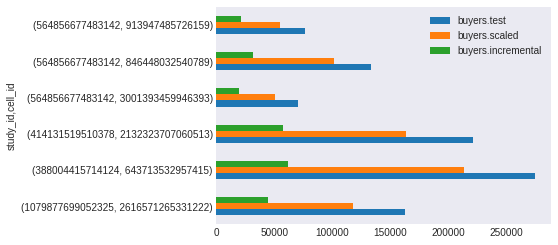

In [20]:
dfg[['buyers.test','buyers.scaled','buyers.incremental']].plot(kind='barh')

In [21]:
# (dfg.sum()!=0).values
dfg

population.test  population.control  \
study_id         cell_id                                                 
1079877699052325 2616571265331222       33864043.0           3758877.0   
388004415714124  643713532957415        42574139.0           4732042.0   
414131519510378  2132323707060513       35972462.0           4904691.0   
564856677483142  3001393459946393        9680486.0           1320151.0   
                 846448032540789        17987689.0           2454252.0   
                 913947485726159        11523740.0           1570653.0   

                                   population.reached  impressions  \
study_id         cell_id                                             
1079877699052325 2616571265331222          29443220.0  209583941.0   
388004415714124  643713532957415           37444730.0  287896831.0   
414131519510378  2132323707060513          31386254.0  287612689.0   
564856677483142  3001393459946393           8556377.0   88479117.0   
                 846448032540789           15837867.0  146150501.0   
                 913947485726159           10252905.0  121941961.0   

                                           spend   frequency    buyers.test  \
study_id         cell_id                                                      
1079877699052325 2616571265331222  161067.857917  113.283953  162598.422695   
388004415714124  643713532957415   340142.178534  101.416082  275064.823476   
414131519510378  2132323707060513  485927.991717  146.390054  220994.000000   
564856677483142  3001393459946393   79624.776596  159.516685   70412.798041   
                 846448032540789   119573.015018  144.366147  133212.900675   
                 913947485726159   118454.618460  184.592037   76665.418018   

                                   buyers.control  buyers.scaled  \
study_id         cell_id                                           
1079877699052325 2616571265331222    13133.731040  118299.979679   
388004415714124  643713532957415     23707.318353  213321.080001   
414131519510378  2132323707060513    22345.000000  163854.436663   
564856677483142  3001393459946393     6910.456664   50662.557719   
                 846448032540789     13875.352556  101721.115961   
                 913947485726159      7492.433273   54976.487401   

                                   buyers.incremental  ...  \
study_id         cell_id                               ...   
1079877699052325 2616571265331222        44298.443019  ...   
388004415714124  643713532957415         61743.743477  ...   
414131519510378  2132323707060513        57139.563337  ...   
564856677483142  3001393459946393        19750.240325  ...   
                 846448032540789         31491.784716  ...   
                 913947485726159         21688.930617  ...   

                                   advancedSales.incremental  \
study_id         cell_id                                       
1079877699052325 2616571265331222               1.622985e+06   
388004415714124  643713532957415                8.717429e+05   
414131519510378  2132323707060513               3.110540e+06   
564856677483142  3001393459946393               0.000000e+00   
                 846448032540789                0.000000e+00   
                 913947485726159                0.000000e+00   

                                   advancedSales.baseline  advancedSales.lift  \
study_id         cell_id                                                        
1079877699052325 2616571265331222            6.043663e+06            4.004018   
388004415714124  643713532957415             4.210823e+06            2.752790   
414131519510378  2132323707060513            1.129472e+07            3.989864   
564856677483142  3001393459946393            0.000000e+00            0.000000   
                 846448032540789             0.000000e+00            0.000000   
                 913947485726159             0.000000e+00            0.000000   

                                   is_dft  a

In [9]:
dfg[['buyers.test','buyers.control','buyers.scaled','buyers.incremental','buyers.delta']]

buyers.test  buyers.control  \
study_id         cell_id                                           
1079877699052325 2616571265331222  162598.422695    13133.731040   
388004415714124  643713532957415   275064.823476    23707.318353   
414131519510378  2132323707060513  220994.000000    22345.000000   
564856677483142  3001393459946393   70412.798041     6910.456664   
                 846448032540789   133212.900675    13875.352556   
                 913947485726159    76665.418018     7492.433273   

                                   buyers.scaled  buyers.incremental  \
study_id         cell_id                                               
1079877699052325 2616571265331222  118299.979679        44298.443019   
388004415714124  643713532957415   213321.080001        61743.743477   
414131519510378  2132323707060513  163854.436663        57139.563337   
564856677483142  3001393459946393   50662.557719        19750.240325   
                 846448032540789   101721.115961        31491.784716   
                 913947485726159    54976.487401        21688.930617   

                                   buyers.delta  
study_id         cell_id                         
1079877699052325 2616571265331222   5373.686359  
388004415714124  643713532957415    7174.370561  
414131519510378  2132323707060513   5884.924686  
564856677483142  3001393459946393   3207.618499  
                 846448032540789    4525.659963  
                 913947485726159    3354.359721

In [10]:
# dfg['buyers.control']*dfg['buyers.test']/dfg['buyers.control']
dfg['buyers.scaled']-dfg['buyers.test']

study_id          cell_id         
1079877699052325  2616571265331222   -44298.443016
388004415714124   643713532957415    -61743.743475
414131519510378   2132323707060513   -57139.563337
564856677483142   3001393459946393   -19750.240322
                  846448032540789    -31491.784714
                  913947485726159    -21688.930617
dtype: float64

In [22]:
dfg.columns

Index(['population.test', 'population.control', 'population.reached',
       'impressions', 'spend', 'frequency', 'buyers.test', 'buyers.control',
       'buyers.scaled', 'buyers.incremental', 'buyers.reached',
       'buyers.reachedPercent', 'buyers.baseline', 'buyers.lift',
       'buyers.delta', 'buyers.pValue', 'buyers.isStatSig', 'conversions.test',
       'conversions.control', 'conversions.scaled', 'conversions.incremental',
       'conversions.reached', 'conversions.reachedPercent',
       'conversions.baseline', 'conversions.lift', 'conversions.delta',
       'conversions.pValue', 'conversions.isStatSig',
       'advancedConversions.test', 'advancedConversions.control',
       'advancedConversions.scaled', 'advancedConversions.incremental',
       'advancedConversions.baseline', 'advancedConversions.lift',
       'incrementalROAS', 'sales.test', 'sales.control', 'sales.scaled',
       'sales.incremental', 'sales.reached', 'sales.baseline', 'sales.lift',
       'sales.delta', '